In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import csv


%matplotlib inline
identificationArray = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
usedID = []

In [53]:
def alphaGenerator():
    id = ""
    while(len(id)<4):
        id+=random.choice(identificationArray)
        if (len(id) == 4 and id in usedID):
            id = ""
    usedID.append(id)
    return id


In [54]:
def indexValues(currentpop,flag):
    globalIndex = 0
    ashraestandard = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.2,0.7,0.7,0.7,0.7,0.5,
                       0.7,0.7,0.7,0.7,0.3,0.1,0.1,0.1,0.1,0.05,0.05])
    exactAshraeValues = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.2,0.7,0.7,0.7,0.7,0.5,
                       0.7,0.7,0.7,0.7,0.3,0.1,0.1,0.1,0.1,0.05,0.05])
    
    for x in range(100):
        index =0
        ratio = schabelIndex(currentpop,flag)
        currentratio = ratio
        for ele in range(1,24):
            value = currentratio[ele]-ashraestandard[ele]
            if(np.isfinite(value)):
                index = index + (value**2)
        index = math.sqrt(index/24)
        globalIndex = globalIndex + index
    globalIndex = globalIndex/100
    return(globalIndex)

In [55]:
def generateVariable(ratio):
    value = random.randint(1, 100)
    if value <= 100*ratio:
        return True
    return False
    

In [56]:
#Create a Population With a Certain Amount of BT devices
def popCreator(popSize, ratio):
    humanList = []
    BT = []
    currentnumber = 0
    BTneeded = ratio*popSize
    for x in range(popSize):
        humanList.append(x)
        if(currentnumber < BTneeded):
            currentnumber+= 1
            BT.append(alphaGenerator())
        else:
            BT.append(np.nan)
    dataFrame = {'human': humanList, 'BT': BT}
    pop = pd.DataFrame(data = dataFrame)
    return(pop)

In [57]:
#not working as intended
def plotter(ratio):
    plt.plot(ratio[1:], color='blue')
    plt.plot(np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.2,0.7,0.7,0.7,0.7,0.5,
                      0.7,0.7,0.7,0.7,0.3,0.1,0.1,0.1,0.1,0.05,0.05]),color='pink')

In [58]:
def schabelIndex(schabelpop,magicFlag):
    #random choice with staying occupancy(nan can be randomly chosen)
    import random
    # Initial assignment
    mc = np.zeros(25)
    r = np.ones(25)
    n = np.zeros(25)
    #fraction differs slightly from the ashrae standards
    #TODO: Add Random Sampling instead of ASHRAE
    
    #magicNumber determines transition ratio
        
    
    
    
    
    frac = [.5,.01,.01,.01,.01,.01,.01,.1,.2,.7,.7,.7,.7,.5
            ,.7,.7,.7,.7,.3,.1,.1,.1,.1,.05,.05]
    ashraestandard = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.2,0.7,0.7,0.7,0.7,0.5,
                      0.7,0.7,0.7,0.7,0.3,0.1,0.1,0.1,0.1,0.05,0.05])
    correctionFactor = 2

    #array holder
    samplearray = []
    
    # Population estimation using repeated capture & recapture method (i = Nr of days)
    for i in range(5):
        sample_day=schabelpop.sample(frac = frac[0])
        # Daily sampling
        #Hourly sampling(samp--ling ratio from ASHRAE 90.1 Appendix G)
        for j in range(25):
            # if we run the first day make an entry to the previous array
            if(i==0):
                if(j==0):
                    samplearray.append((set(sample_day.BT)))
                else:
                    sample_hour = sample_day.sample(frac = frac[j])
                    samplearray.append((set(sample_hour.BT)))

            else:
                if(j==0):
                    sample_hour = sample_day
                else:
                    sample_hour = sample_day.sample(frac = frac[j])
                currentsample_day = set(sample_hour.BT)
                
                #R Correction Method 2
                #if there is atleast one person found
                #This can be written better
                if(magicFlag == 0):
                    magic = random.randint(1,11)
                else:
                    magic = magicFlag
                if(len(samplearray[j])> 0):
                    counter = 0
                    los = len(samplearray[j])
                    numberstayed = []
                    #convert set to list
                    lssamplearray = list(samplearray[j])
                    
                    #populate half the list with the current sample
                    while(len(currentsample_day)//magic > len(numberstayed) and counter < los ):
                        numberstayed.append(lssamplearray[counter])
                        counter = counter +1
                    
                    for person in range(0,(len(currentsample_day)// magic)):
                        numberstayed.append(person)
                    numberstayed = set(numberstayed)
                #R Correction Method 1
                #If the compound hour array is longer than 1(contains a variable that is not nan) replace half of the values
                #of the new hour samples to simulate a population remaining

                #calculate (number marked in first catch) * (Number caught in second catch, in total)
                #if(j < 6):
                #    correctionFactor = 1
                #elif(j <12):
                #    correctionFactor = 1
                #elif(j <18):
                #   correctionFactor = 1
                #else:
                #    correctionFactor = 1
                
                #mc[j] = mc[j] + ((len(samplearray[j])-1)*(len(currentsample_day) - 1))
                #r[j] = r[j] + (len(samplearray[j] & currentsample_day) - 1 + 1* len(currentsample_day)//correctionFactor)
                #samplearray[j] =(samplearray[j] | currentsample_day)
                                        
                mc[j] = mc[j] + ((len(samplearray[j])-1)*(len(numberstayed) - 1))
                r[j] = r[j] + (len(samplearray[j] & numberstayed) - 1)
                samplearray[j] =(samplearray[j] | numberstayed)

    n = mc / r
    ratio = n / n[0] * np.ones(25)
    returnList = [ratio,ashraestandard]
    return(returnList)

Max Device Program

In [59]:
def newDevice(schabelpop,magicFlag):
    #random choice with staying occupancy(nan can be randomly chosen)
    import random
    # Initial assignment
    mc = np.zeros(25)
    r = np.ones(25)
    m = np.zeros(25)
    c = np.zeros((5,25))
    maxDevices = [0]*5
    ratio = [0]*25
    #fraction differs slightly from the ashrae standards
    #TODO: Add Random Sampling instead of ASHRAE
    
    #magicNumber determines transition ratio
        
    
    
    
    
    frac = [.5,.01,.01,.01,.01,.01,.01,.1,.2,.7,.7,.7,.7,.5
            ,.7,.7,.7,.7,.3,.1,.1,.1,.1,.05,.05]
    ashraestandard = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.2,0.7,0.7,0.7,0.7,0.5,
                      0.7,0.7,0.7,0.7,0.3,0.1,0.1,0.1,0.1,0.05,0.05])
    correctionFactor = 2

    #array holder
    samplearray = []
    
    # Population estimation using repeated capture & recapture method (i = Nr of days)
    for i in range(5):
        print("DAY:",i)
        sample_day=schabelpop.sample(frac = frac[0])
        # Daily sampling
        #Hourly sampling(samp--ling ratio from ASHRAE 90.1 Appendix G)
        for j in range(25):
            # if we run the first day make an entry to the previous array
            if(i==0):
                print("HOUR:",j)
                if(j==0):
                    samplearray.append((set(sample_day.BT)))
                    sample_hour = sample_day
                else:
                    sample_hour = sample_day.sample(frac = frac[j])
                    samplearray.append((set(sample_hour.BT)))
                    #print((sample_hour.BT))
                    c[i][j]= len(set(sample_hour.BT))
                    print("Day 0: ",c[i][j])
                    if c[i][j]> maxDevices[i]:
                        maxDevices[i]= c[i][j]
                print("")

            else:
                print("HOUR:",j)
                
                if(j==0):
                    sample_hour = sample_day
                else:
                    sample_hour = sample_day.sample(frac = frac[j])
                currentsample_day = set(sample_hour.BT)
                #R Correction Method 2
                #if there is atleast one person found
                #This can be written better
                if(magicFlag == 0):
                    magic = random.randint(1,11)
                else:
                    magic = magicFlag
                if(len(samplearray[j])> 0):
                    counter = 0
                    los = len(samplearray[j])
                    numberstayed = []
                    #convert set to list
                    lssamplearray = list(samplearray[j])       
                    
                    #populate half the list with the current sample
                    while(len(currentsample_day)//magic > len(numberstayed) and counter < los ):
                        numberstayed.append(lssamplearray[counter])
                        counter = counter +1
                    
                    tempList = list(currentsample_day)
                    for person in range(0,(len(currentsample_day)// magic)):
                        numberstayed.append((tempList[person]))
                    numberstayed = set(numberstayed)
                    # print(numberstayed)

                else:
                    numberstayed = []
                
                if(len(numberstayed)>=1):
                    c[i][j] = (len(numberstayed))-1
                else:
                    c[i][j] = (len(numberstayed))
                print("NUMBER BT DEVICES",c[i][j])
                
                if c[i][j]> maxDevices[i]:
                    maxDevices[i]= c[i][j]
                    
                samplearray[j] =(samplearray[j] | set(numberstayed))
                # print(samplearray[j])
                
                print("")
                
    for i in range(5):
        for j in range(1,25):
            if(maxDevices[i]==0):
                ratio[j] = 0 
            else:
                if(j==2):
                    print("DAY:",i)
                    print("found Devices: ",c[i][j])
                    print("max dev; ",maxDevices[i])
                ratio[j] = ratio[j] + (c[i][j] / maxDevices[i])
    for j in range(25):
        ratio[j] = ratio[j]/5
    returnList = [ratio,ashraestandard]
    
    print(ratio)
    return(returnList)

DAY: 0
HOUR: 0

HOUR: 1
Day 0:  2.0

HOUR: 2
Day 0:  2.0

HOUR: 3
Day 0:  2.0

HOUR: 4
Day 0:  1.0

HOUR: 5
Day 0:  2.0

HOUR: 6
Day 0:  2.0

HOUR: 7
Day 0:  17.0

HOUR: 8
Day 0:  36.0

HOUR: 9
Day 0:  121.0

HOUR: 10
Day 0:  118.0

HOUR: 11
Day 0:  118.0

HOUR: 12
Day 0:  120.0

HOUR: 13
Day 0:  97.0

HOUR: 14
Day 0:  123.0

HOUR: 15
Day 0:  126.0

HOUR: 16
Day 0:  122.0

HOUR: 17
Day 0:  120.0

HOUR: 18
Day 0:  56.0

HOUR: 19
Day 0:  19.0

HOUR: 20
Day 0:  19.0

HOUR: 21
Day 0:  21.0

HOUR: 22
Day 0:  21.0

HOUR: 23
Day 0:  9.0

HOUR: 24
Day 0:  8.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 256.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 0.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 2.0

HOUR: 8
NUMBER BT DEVICES 32.0

HOUR: 9
NUMBER BT DEVICES 19.0

HOUR: 10
NUMBER BT DEVICES 65.0

HOUR: 11
NUMBER BT DEVICES 32.0

HOUR: 12
NUMBER BT DEVICES 24.0

HOUR: 13
NUMBER BT DE

HOUR: 3
NUMBER BT DEVICES 1.0

HOUR: 4
NUMBER BT DEVICES 1.0

HOUR: 5
NUMBER BT DEVICES 1.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 16.0

HOUR: 8
NUMBER BT DEVICES 33.0

HOUR: 9
NUMBER BT DEVICES 108.0

HOUR: 10
NUMBER BT DEVICES 111.0

HOUR: 11
NUMBER BT DEVICES 110.0

HOUR: 12
NUMBER BT DEVICES 113.0

HOUR: 13
NUMBER BT DEVICES 78.0

HOUR: 14
NUMBER BT DEVICES 113.0

HOUR: 15
NUMBER BT DEVICES 102.0

HOUR: 16
NUMBER BT DEVICES 105.0

HOUR: 17
NUMBER BT DEVICES 102.0

HOUR: 18
NUMBER BT DEVICES 43.0

HOUR: 19
NUMBER BT DEVICES 16.0

HOUR: 20
NUMBER BT DEVICES 15.0

HOUR: 21
NUMBER BT DEVICES 18.0

HOUR: 22
NUMBER BT DEVICES 16.0

HOUR: 23
NUMBER BT DEVICES 4.0

HOUR: 24
NUMBER BT DEVICES 8.0

DAY: 2
HOUR: 0
NUMBER BT DEVICES 135.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 1.0

HOUR: 3
NUMBER BT DEVICES 1.0

HOUR: 4
NUMBER BT DEVICES 1.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 14.0

HOUR: 8
NUMBER BT DEV

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 6.0

HOUR: 8
NUMBER BT DEVICES 14.0

HOUR: 9
NUMBER BT DEVICES 47.0

HOUR: 10
NUMBER BT DEVICES 49.0

HOUR: 11
NUMBER BT DEVICES 48.0

HOUR: 12
NUMBER BT DEVICES 53.0

HOUR: 13
NUMBER BT DEVICES 41.0

HOUR: 14
NUMBER BT DEVICES 52.0

HOUR: 15
NUMBER BT DEVICES 50.0

HOUR: 16
NUMBER BT DEVICES 51.0

HOUR: 17
NUMBER BT DEVICES 53.0

HOUR: 18
NUMBER BT DEVICES 23.0

HOUR: 19
NUMBER BT DEVICES 6.0

HOUR: 20
NUMBER BT DEVICES 8.0

HOUR: 21
NUMBER BT DEVICES 8.0

HOUR: 22
NUMBER BT DEVICES 8.0

HOUR: 23
NUMBER BT DEVICES 2.0

HOUR: 24
NUMBER BT DEVICES 4.0

DAY: 2
HOUR: 0
NUMBER BT DEVICES 62.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 0.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 6.0

HOUR: 8
NUMBER BT DEVICES 12.0

HOUR: 9
NUMBER BT DEVICES 49.0

HOU

Day 0:  179.0

HOUR: 14
Day 0:  243.0

HOUR: 15
Day 0:  245.0

HOUR: 16
Day 0:  240.0

HOUR: 17
Day 0:  244.0

HOUR: 18
Day 0:  99.0

HOUR: 19
Day 0:  34.0

HOUR: 20
Day 0:  32.0

HOUR: 21
Day 0:  34.0

HOUR: 22
Day 0:  41.0

HOUR: 23
Day 0:  20.0

HOUR: 24
Day 0:  21.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 123.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 1.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 2.0

HOUR: 7
NUMBER BT DEVICES 4.0

HOUR: 8
NUMBER BT DEVICES 9.0

HOUR: 9
NUMBER BT DEVICES 66.0

HOUR: 10
NUMBER BT DEVICES 204.0

HOUR: 11
NUMBER BT DEVICES 30.0

HOUR: 12
NUMBER BT DEVICES 130.0

HOUR: 13
NUMBER BT DEVICES 53.0

HOUR: 14
NUMBER BT DEVICES 46.0

HOUR: 15
NUMBER BT DEVICES 137.0

HOUR: 16
NUMBER BT DEVICES 201.0

HOUR: 17
NUMBER BT DEVICES 35.0

HOUR: 18
NUMBER BT DEVICES 18.0

HOUR: 19
NUMBER BT DEVICES 4.0

HOUR: 20
NUMBER BT DEVICES 6.0

HOUR: 21
NUMBER BT DEVICES 11.0

HOUR: 22
N


HOUR: 14
NUMBER BT DEVICES 200.0

HOUR: 15
NUMBER BT DEVICES 209.0

HOUR: 16
NUMBER BT DEVICES 199.0

HOUR: 17
NUMBER BT DEVICES 214.0

HOUR: 18
NUMBER BT DEVICES 101.0

HOUR: 19
NUMBER BT DEVICES 36.0

HOUR: 20
NUMBER BT DEVICES 34.0

HOUR: 21
NUMBER BT DEVICES 34.0

HOUR: 22
NUMBER BT DEVICES 33.0

HOUR: 23
NUMBER BT DEVICES 19.0

HOUR: 24
NUMBER BT DEVICES 18.0

DAY: 3
HOUR: 0
NUMBER BT DEVICES 259.0

HOUR: 1
NUMBER BT DEVICES 2.0

HOUR: 2
NUMBER BT DEVICES 2.0

HOUR: 3
NUMBER BT DEVICES 3.0

HOUR: 4
NUMBER BT DEVICES 2.0

HOUR: 5
NUMBER BT DEVICES 2.0

HOUR: 6
NUMBER BT DEVICES 3.0

HOUR: 7
NUMBER BT DEVICES 30.0

HOUR: 8
NUMBER BT DEVICES 65.0

HOUR: 9
NUMBER BT DEVICES 194.0

HOUR: 10
NUMBER BT DEVICES 190.0

HOUR: 11
NUMBER BT DEVICES 197.0

HOUR: 12
NUMBER BT DEVICES 195.0

HOUR: 13
NUMBER BT DEVICES 146.0

HOUR: 14
NUMBER BT DEVICES 194.0

HOUR: 15
NUMBER BT DEVICES 195.0

HOUR: 16
NUMBER BT DEVICES 210.0

HOUR: 17
NUMBER BT DEVICES 193.0

HOUR: 18
NUMBER BT DEVICES 87.0

HOU

HOUR: 12
Day 0:  254.0

HOUR: 13
Day 0:  185.0

HOUR: 14
Day 0:  249.0

HOUR: 15
Day 0:  257.0

HOUR: 16
Day 0:  255.0

HOUR: 17
Day 0:  241.0

HOUR: 18
Day 0:  111.0

HOUR: 19
Day 0:  39.0

HOUR: 20
Day 0:  34.0

HOUR: 21
Day 0:  32.0

HOUR: 22
Day 0:  39.0

HOUR: 23
Day 0:  18.0

HOUR: 24
Day 0:  22.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 127.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 0.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 1.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 1.0

HOUR: 7
NUMBER BT DEVICES 14.0

HOUR: 8
NUMBER BT DEVICES 32.0

HOUR: 9
NUMBER BT DEVICES 92.0

HOUR: 10
NUMBER BT DEVICES 98.0

HOUR: 11
NUMBER BT DEVICES 102.0

HOUR: 12
NUMBER BT DEVICES 103.0

HOUR: 13
NUMBER BT DEVICES 75.0

HOUR: 14
NUMBER BT DEVICES 104.0

HOUR: 15
NUMBER BT DEVICES 101.0

HOUR: 16
NUMBER BT DEVICES 100.0

HOUR: 17
NUMBER BT DEVICES 93.0

HOUR: 18
NUMBER BT DEVICES 47.0

HOUR: 19
NUMBER BT DEVICES 15.0

HOUR: 20
NUMBER BT DEVICES 15.0

HOUR

PermissionError: [Errno 13] Permission denied: 'BT_RatioMaxDeviceCorrected.csv'

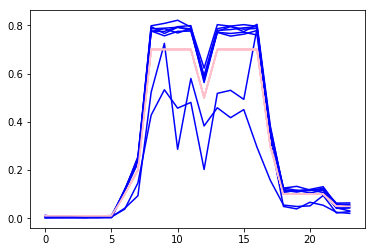

In [60]:
devMax()

# random sample profile version1

In [61]:
def schabelIndexRandom(schabelpop,magicFlag):
    #random choice with staying occupancy(nan can be randomly chosen)
    import random
    # Initial assignment
    mc = np.zeros(25)
    r = np.ones(25)
    n = np.zeros(25)
    #fraction differs slightly from the ashrae standards
    #TODO: Add Random Sampling instead of ASHRAE
    #magicNumber determines transition ratio
        
    
    
    
    frac = []
    for x in range(25):
        element = random.uniform(.05,1)
        frac.append(element)
    
    correctionFactor = 2

    #array holder
    samplearray = []
    
    # Population estimation using repeated capture & recapture method (i = Nr of days)
    for i in range(5):
        sample_day=schabelpop.sample(frac = frac[0])
        # Daily sampling
        #Hourly sampling(samp--ling ratio from ASHRAE 90.1 Appendix G)
        for j in range(25):
            # if we run the first day make an entry to the previous array
            if(i==0):
                if(j==0):
                    samplearray.append((set(sample_day.BT)))
                else:
                    sample_hour = sample_day.sample(frac = frac[j])
                    samplearray.append((set(sample_hour.BT)))
                

            else:
                if(j==0):
                    sample_hour = sample_day
                else:
                    sample_hour = sample_day.sample(frac = frac[j])
                currentsample_day = set(sample_hour.BT)
                
                #R Correction Method 2
                #if there is atleast one person found
                #This can be written better
                #SHOULD PROBABLY B ANY NUMBER BETWEEN 2 AND 11
                if(magicFlag == 0):
                    magic = random.randint(1,11)
                else:
                    magic = magicFlag
                if(len(samplearray[j])> 0):
                    counter = 0
                    los = len(samplearray[j])
                    numberstayed = []
                    #convert set to list
                    lssamplearray = list(samplearray[j])
                    
                    #populate half the list with the current sample
                    while(len(currentsample_day)//magic > len(numberstayed) and counter < los ):
                        numberstayed.append(lssamplearray[counter])
                        counter = counter +1
                    
                    tempList = list(currentsample_day)
                    for person in range(0,(len(currentsample_day)// magic)):
                        numberstayed.append(tempList[person])
                    numberstayed = set(numberstayed)
                    print(numberstayed)
                #R Correction Method 1
                #If the compound hour array is longer than 1(contains a variable that is not nan) replace half of the values
                #of the new hour samples to simulate a population remaining

                #calculate (number marked in first catch) * (Number caught in second catch, in total)
                #3if(j < 6):
                #    correctionFactor = 1
                #elif(j <12):
                #    correctionFactor = 1
                #elif(j <18):
                #   correctionFactor = 1
                #else:
                #    correctionFactor = 1
                
                #mc[j] = mc[j] + ((len(samplearray[j])-1)*(len(currentsample_day) - 1))
                #r[j] = r[j] + (len(samplearray[j] & currentsample_day) - 1 + 1* len(currentsample_day)//correctionFactor)
                #samplearray[j] =(samplearray[j] | currentsample_day)
                                        
                mc[j] = mc[j] + ((len(samplearray[j])-1)*(len(numberstayed) - 1))
                r[j] = r[j] + (len(samplearray[j] & numberstayed) - 1)
                samplearray[j] =(samplearray[j] | numberstayed)

    n = mc / r
    ratio = n / n[0] * np.ones(25)
    returnList = [ratio,frac]
    return(returnList)

In [62]:
def indexValuesRandom(pop,flag):
    globalIndex = 0
    for x in range(1):
        
        returnList = schabelIndexRandom(pop,flag)
        ratio = returnList[0]
        standardProfile = returnList[1]
        index =0
        currentratio = ratio
        for ele in range(1,25):
            value = currentratio[ele]-standardProfile[ele-1]
            if(np.isfinite(value)):
                index = index + (value**2)
        index = math.sqrt(index/24)
        globalIndex = globalIndex + index
    globalIndex = globalIndex/1
    return(globalIndex)

In [63]:
def indexDevice(pop,flag):
    globalIndex = 0
    for x in range(1):
        returnList = newDevice(pop,flag)
        ratio = returnList[0]
        standardProfile = returnList[1]
        index =0
        currentratio = ratio
        for ele in range(0,24):
            value = currentratio[ele]-standardProfile[ele]
            if(np.isfinite(value)):
                index = index + (value**2)
        index = math.sqrt(index/24)
        globalIndex = globalIndex + index
    globalIndex = globalIndex/1
    return(globalIndex)

In [64]:
#not working as intended
def plotterRandom(returnList):
    ratio = returnList[0]
    standard = returnList[1]
    plt.plot(ratio[1:], color='blue')
    plt.plot(standard[1:], color='pink')

In [65]:
#not working yet
#checks the exact ratio of BT devices to Population Size for a given pop
def btRatioChecker(pop):
    num = 0
    poptolist = pop['BT'].tolist()
    for x in poptolist: 
        if isinstance(x,str):
            num+=1
    return(num/len(pop.BT))

In [66]:
def main():
    csv_list = []
    fields = ['Population', 'BT Ratio','Transistion Ratio','RMSE']
    filename = "BT_RatioVersionTest.csv"
   
    btInput = [.8]
    populationInput= [2500]
    flagInput = [4]
    for x in populationInput:
        population = x
        for y in btInput:
            btRatio = y
        #for btRatio in btRatioWanted:
            for z in flagInput:
                magicFlag = z
                currentpop =0
                currentpop = popCreator(population,btRatio)
                rmls = indexValuesRandom(currentpop,magicFlag)
                plotter(schabelIndex(currentpop,magicFlag)[0])
                print("Population is: {} and BT is: {} Index values is: {}".format(population, btRatio ,rmls))
                a = [population, btRatio,magicFlag,rmls,]
                csv_list.append(a)
    with open(filename,'w') as csvfile:
         # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 
      
        # writing the fields 
        csvwriter.writerow(fields) 
      
        # writing the data rows 
        csvwriter.writerows(csv_list)
              

In [16]:
def secondary():
    csv_list = []
    fields = ['Population', 'BT Ratio','Transistion Ratio','RMLS']
    filename = "BT_Ratio_Random3.csv"
    btInput = [.05]
    populationInput= [500,1000,1500,2000,2500]
    for x in populationInput:
        population = x
        for y in btInput:
            btRatio = y
        #for btRatio in btRatioWanted:
            for z in range(5):
                magicFlag = z
                currentpop = popCreator(population,btRatio)
                rmls = indexValuesRandom(currentpop,magicFlag)
                a = [population, btRatio,magicFlag,rmls,]
                csv_list.append(a)
                print("Population is: {} and BT is: {} Index values is: {}".format(population, btRatio ,rmls))
    with open(filename,'w') as csvfile:
         # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 
      
        # writing the fields 
        csvwriter.writerow(fields) 
      
        # writing the data rows 
        csvwriter.writerows(csv_list)

In [17]:
def tertiary():
    csv_list = []
    fields = ['Population','BT Ratio','Transistion Ratio','RMLS']
    filename = "BT_Ratio_2.csv"
    btInput=[.05,.1,.3,.5,.6,.7,.8,.9]
    populationInputs=[500,1000,1500,2000,2500]
    for x in populationInputs:
        population = x
        for y in btInput:
            btRatio = y
            for z in range(5):
                flag = z
                currentpop = popCreator(population,btRatio)
                rmls = indexValues(currentpop,flag)
                plotter(schabelIndex(currentpop,flag))
                print(population,btRatio,rmls,flag)
                a = [population, btRatio,flag,rmls,]
                csv_list.append(a)
    with open(filename,'w') as csvfile:
         # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 
      
        # writing the fields 
        csvwriter.writerow(fields) 
      
        # writing the data rows 
        csvwriter.writerows(csv_list)
    

In [18]:
#produces a csv of the distribution points for the occupancy profile using a varibale population but holding BT constant
def graphCreatorVPCB():
    timer =0
    csv_list = []
    fields = ['population','1','2','3','4','5','6','7','8','9','10','11','12'
              ,'13','14','15','16','17','18','19','20','21','22','23','24']
    filename = "GraphsTest1.csv"
    btInput=[.05,.1,.3,.5,.6,.7,.8,.9]
    populationInputs=[500]
    for population in populationInputs:
        for btRatio in btInput:
            currentpop = popCreator(population,btRatio)
            for z in range(1):
                flag = 2
                ratio=schabelIndex(currentpop,flag)[0]
                ratio[0] = population
                print(timer*5,'%')
                timer = timer+1
                csv_list.append(ratio)
    with open(filename,'w') as csvfile:
         # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 
      
        # writing the fields 
        csvwriter.writerow(fields) 
      
        # writing the data rows 
        csvwriter.writerows(csv_list)

In [50]:
def devMax():
    csv_list = []
    fields = ['Population', 'BT Ratio','Transistion Ratio','RMSE']
    filename = "BT_RatioMaxDeviceCorrected.csv"
   
    btInput = [.7]
    populationInput= [500,1000]
    flagInput = [0,2,3,4]
    for x in populationInput:
        population = x
        for y in btInput:
            btRatio = y
        #for btRatio in btRatioWanted:
            for z in flagInput:
                magicFlag = z
                currentpop =0
                currentpop = popCreator(population,btRatio)
                #NEEDS TO BE CHANGED!
                rmls = indexDevice(currentpop,magicFlag)
                plotter(newDevice(currentpop,magicFlag)[0])
                print(btRatioChecker(currentpop))
                #print("Population is: {} and BT is: {} Index values is: {}".format(population, btRatio ,rmls))
                a = [population, btRatio,magicFlag,rmls,]
                csv_list.append(a)
    with open(filename,'w') as csvfile:
         # creating a csv writer object 
        csvwriter = csv.writer(csvfile) 
      
        # writing the fields 
        csvwriter.writerow(fields) 
      
        # writing the data rows 
        csvwriter.writerows(csv_list)
              

{nan, 'QIAN', 'FVTW', 'HHEZ', 'OJSG', 'NOVC', 'UVTH', 'HRDJ', 'RRRW', 'SEIK', 'UYQM', 'OOZN', 'WZZW', 'AQNT', 'KLXL', 'JKDB', 'IIZM', 'VOXK', 'GDHH', 'CNFJ', 'ZKEN', 'SRKX', 'NTCW', 'UNFO', 'XOGF', 'KBQC', 'ZOAI', 'WOCS', 'LQPK', 'NOUT', 'IKHC', 'JZOO', 'IKRK', 'GKWE', 'TIJB', 'UMTD', 'QFWF', 'RLBW', 'OCZA', 'DOQE', 'GUKK', 'WDWR', 'YJVD', 'JXYK', 'JVRL', 'EJDG', 'NBSA', 'QQRD', 'XWNS', 'YPVN', 'DQZG', 'HBWY', 'VSVR', 'WOHT', 'BQWB', 'YQYL', 'WOVI', 'SRFJ', 'RSRE', 'FJZU', 'DPCQ', 'QCVR', 'NKLW', 'XKLX', 'KRUW', 'MUHX', 'ECIP', 'HFGI', 'YAUX', 'LRVI', 'FXOS', 'KOUT', 'DUCW', 'OPSI', 'DDKU', 'UEDF', 'BMBQ', 'FYEP', 'YPAD', 'EQLJ', 'UMPW', 'WHQO', 'DVNJ', 'VGNK', 'GLTC', 'TFBH', 'TDTX', 'BJFV', 'HYUW', 'QGFZ', 'TBKZ', 'UGXH', 'DGGZ', 'JVJQ', 'BIXE', 'VXZV', 'XZGF', 'SKQN', 'AMCE', 'TCFC', 'JDBU', 'PRBW', 'RJXU', 'GQTG', 'WIIQ', 'GDZU', 'WDTI', 'BLQC', 'CWYZ', 'DIOI', 'XLIR', 'OZWE', 'HPNT', 'RBWS', 'NKZW', 'AILR', 'CTEM', 'XWFT', 'LLNO', 'SGZA', 'BFJB', 'CDWJ', 'RMZZ', 'FJRB', 'AIIN', 'A

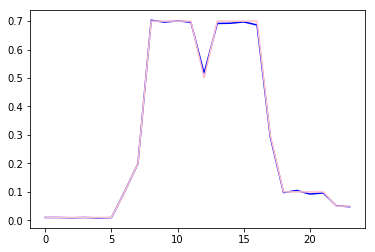

In [67]:
main()

In [ ]:
graphCreatorVPCB()

In [532]:
import random

random.randint(0,10)

8

DAY: 0
HOUR: 0

HOUR: 1
Day 0:  2.0

HOUR: 2
Day 0:  2.0

HOUR: 3
Day 0:  2.0

HOUR: 4
Day 0:  2.0

HOUR: 5
Day 0:  1.0

HOUR: 6
Day 0:  1.0

HOUR: 7
Day 0:  14.0

HOUR: 8
Day 0:  35.0

HOUR: 9
Day 0:  119.0

HOUR: 10
Day 0:  120.0

HOUR: 11
Day 0:  114.0

HOUR: 12
Day 0:  114.0

HOUR: 13
Day 0:  85.0

HOUR: 14
Day 0:  117.0

HOUR: 15
Day 0:  116.0

HOUR: 16
Day 0:  118.0

HOUR: 17
Day 0:  117.0

HOUR: 18
Day 0:  51.0

HOUR: 19
Day 0:  15.0

HOUR: 20
Day 0:  18.0

HOUR: 21
Day 0:  18.0

HOUR: 22
Day 0:  14.0

HOUR: 23
Day 0:  10.0

HOUR: 24
Day 0:  8.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 42.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 3.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 6.0

HOUR: 8
NUMBER BT DEVICES 6.0

HOUR: 9
NUMBER BT DEVICES 199.0

HOUR: 10
NUMBER BT DEVICES 25.0

HOUR: 11
NUMBER BT DEVICES 27.0

HOUR: 12
NUMBER BT DEVICES 104.0

HOUR: 13
NUMBER BT D

0.7
DAY: 0
HOUR: 0

HOUR: 1
Day 0:  2.0

HOUR: 2
Day 0:  2.0

HOUR: 3
Day 0:  1.0

HOUR: 4
Day 0:  2.0

HOUR: 5
Day 0:  2.0

HOUR: 6
Day 0:  2.0

HOUR: 7
Day 0:  22.0

HOUR: 8
Day 0:  34.0

HOUR: 9
Day 0:  124.0

HOUR: 10
Day 0:  125.0

HOUR: 11
Day 0:  122.0

HOUR: 12
Day 0:  126.0

HOUR: 13
Day 0:  84.0

HOUR: 14
Day 0:  127.0

HOUR: 15
Day 0:  126.0

HOUR: 16
Day 0:  122.0

HOUR: 17
Day 0:  129.0

HOUR: 18
Day 0:  49.0

HOUR: 19
Day 0:  20.0

HOUR: 20
Day 0:  21.0

HOUR: 21
Day 0:  19.0

HOUR: 22
Day 0:  21.0

HOUR: 23
Day 0:  8.0

HOUR: 24
Day 0:  8.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 129.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 1.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 1.0

HOUR: 5
NUMBER BT DEVICES 1.0

HOUR: 6
NUMBER BT DEVICES 1.0

HOUR: 7
NUMBER BT DEVICES 12.0

HOUR: 8
NUMBER BT DEVICES 32.0

HOUR: 9
NUMBER BT DEVICES 104.0

HOUR: 10
NUMBER BT DEVICES 99.0

HOUR: 11
NUMBER BT DEVICES 98.0

HOUR: 12
NUMBER BT DEVICES 111.0

HOUR: 13
NUMBE

DAY: 0
HOUR: 0

HOUR: 1
Day 0:  2.0

HOUR: 2
Day 0:  2.0

HOUR: 3
Day 0:  2.0

HOUR: 4
Day 0:  2.0

HOUR: 5
Day 0:  1.0

HOUR: 6
Day 0:  2.0

HOUR: 7
Day 0:  17.0

HOUR: 8
Day 0:  37.0

HOUR: 9
Day 0:  122.0

HOUR: 10
Day 0:  125.0

HOUR: 11
Day 0:  127.0

HOUR: 12
Day 0:  122.0

HOUR: 13
Day 0:  89.0

HOUR: 14
Day 0:  120.0

HOUR: 15
Day 0:  124.0

HOUR: 16
Day 0:  126.0

HOUR: 17
Day 0:  121.0

HOUR: 18
Day 0:  49.0

HOUR: 19
Day 0:  21.0

HOUR: 20
Day 0:  18.0

HOUR: 21
Day 0:  16.0

HOUR: 22
Day 0:  22.0

HOUR: 23
Day 0:  10.0

HOUR: 24
Day 0:  10.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 90.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 0.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 10.0

HOUR: 8
NUMBER BT DEVICES 16.0

HOUR: 9
NUMBER BT DEVICES 65.0

HOUR: 10
NUMBER BT DEVICES 66.0

HOUR: 11
NUMBER BT DEVICES 68.0

HOUR: 12
NUMBER BT DEVICES 69.0

HOUR: 13
NUMBER BT 

DAY: 0
HOUR: 0

HOUR: 1
Day 0:  2.0

HOUR: 2
Day 0:  1.0

HOUR: 3
Day 0:  2.0

HOUR: 4
Day 0:  2.0

HOUR: 5
Day 0:  2.0

HOUR: 6
Day 0:  2.0

HOUR: 7
Day 0:  16.0

HOUR: 8
Day 0:  35.0

HOUR: 9
Day 0:  123.0

HOUR: 10
Day 0:  123.0

HOUR: 11
Day 0:  130.0

HOUR: 12
Day 0:  127.0

HOUR: 13
Day 0:  95.0

HOUR: 14
Day 0:  123.0

HOUR: 15
Day 0:  119.0

HOUR: 16
Day 0:  126.0

HOUR: 17
Day 0:  121.0

HOUR: 18
Day 0:  57.0

HOUR: 19
Day 0:  17.0

HOUR: 20
Day 0:  21.0

HOUR: 21
Day 0:  20.0

HOUR: 22
Day 0:  18.0

HOUR: 23
Day 0:  10.0

HOUR: 24
Day 0:  10.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 63.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 0.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 8.0

HOUR: 8
NUMBER BT DEVICES 16.0

HOUR: 9
NUMBER BT DEVICES 50.0

HOUR: 10
NUMBER BT DEVICES 47.0

HOUR: 11
NUMBER BT DEVICES 50.0

HOUR: 12
NUMBER BT DEVICES 50.0

HOUR: 13
NUMBER BT D

DAY: 0
HOUR: 0

HOUR: 1
Day 0:  4.0

HOUR: 2
Day 0:  5.0

HOUR: 3
Day 0:  4.0

HOUR: 4
Day 0:  5.0

HOUR: 5
Day 0:  5.0

HOUR: 6
Day 0:  3.0

HOUR: 7
Day 0:  34.0

HOUR: 8
Day 0:  74.0

HOUR: 9
Day 0:  246.0

HOUR: 10
Day 0:  255.0

HOUR: 11
Day 0:  258.0

HOUR: 12
Day 0:  255.0

HOUR: 13
Day 0:  184.0

HOUR: 14
Day 0:  246.0

HOUR: 15
Day 0:  263.0

HOUR: 16
Day 0:  252.0

HOUR: 17
Day 0:  255.0

HOUR: 18
Day 0:  115.0

HOUR: 19
Day 0:  36.0

HOUR: 20
Day 0:  39.0

HOUR: 21
Day 0:  42.0

HOUR: 22
Day 0:  35.0

HOUR: 23
Day 0:  21.0

HOUR: 24
Day 0:  18.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 105.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 1.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 1.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 20.0

HOUR: 8
NUMBER BT DEVICES 32.0

HOUR: 9
NUMBER BT DEVICES 38.0

HOUR: 10
NUMBER BT DEVICES 69.0

HOUR: 11
NUMBER BT DEVICES 39.0

HOUR: 12
NUMBER BT DEVICES 100.0

HOUR: 13
NUMBER

DAY: 0
HOUR: 0

HOUR: 1
Day 0:  4.0

HOUR: 2
Day 0:  3.0

HOUR: 3
Day 0:  5.0

HOUR: 4
Day 0:  4.0

HOUR: 5
Day 0:  2.0

HOUR: 6
Day 0:  5.0

HOUR: 7
Day 0:  38.0

HOUR: 8
Day 0:  69.0

HOUR: 9
Day 0:  234.0

HOUR: 10
Day 0:  236.0

HOUR: 11
Day 0:  235.0

HOUR: 12
Day 0:  243.0

HOUR: 13
Day 0:  173.0

HOUR: 14
Day 0:  235.0

HOUR: 15
Day 0:  236.0

HOUR: 16
Day 0:  244.0

HOUR: 17
Day 0:  237.0

HOUR: 18
Day 0:  99.0

HOUR: 19
Day 0:  39.0

HOUR: 20
Day 0:  36.0

HOUR: 21
Day 0:  38.0

HOUR: 22
Day 0:  34.0

HOUR: 23
Day 0:  17.0

HOUR: 24
Day 0:  20.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 250.0

HOUR: 1
NUMBER BT DEVICES 3.0

HOUR: 2
NUMBER BT DEVICES 2.0

HOUR: 3
NUMBER BT DEVICES 2.0

HOUR: 4
NUMBER BT DEVICES 3.0

HOUR: 5
NUMBER BT DEVICES 3.0

HOUR: 6
NUMBER BT DEVICES 1.0

HOUR: 7
NUMBER BT DEVICES 29.0

HOUR: 8
NUMBER BT DEVICES 62.0

HOUR: 9
NUMBER BT DEVICES 197.0

HOUR: 10
NUMBER BT DEVICES 214.0

HOUR: 11
NUMBER BT DEVICES 196.0

HOUR: 12
NUMBER BT DEVICES 205.0

HOUR: 13
NUMB

DAY: 0
HOUR: 0

HOUR: 1
Day 0:  4.0

HOUR: 2
Day 0:  3.0

HOUR: 3
Day 0:  5.0

HOUR: 4
Day 0:  5.0

HOUR: 5
Day 0:  5.0

HOUR: 6
Day 0:  4.0

HOUR: 7
Day 0:  34.0

HOUR: 8
Day 0:  73.0

HOUR: 9
Day 0:  233.0

HOUR: 10
Day 0:  243.0

HOUR: 11
Day 0:  243.0

HOUR: 12
Day 0:  237.0

HOUR: 13
Day 0:  185.0

HOUR: 14
Day 0:  238.0

HOUR: 15
Day 0:  250.0

HOUR: 16
Day 0:  239.0

HOUR: 17
Day 0:  238.0

HOUR: 18
Day 0:  99.0

HOUR: 19
Day 0:  31.0

HOUR: 20
Day 0:  35.0

HOUR: 21
Day 0:  37.0

HOUR: 22
Day 0:  35.0

HOUR: 23
Day 0:  18.0

HOUR: 24
Day 0:  17.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 166.0

HOUR: 1
NUMBER BT DEVICES 0.0

HOUR: 2
NUMBER BT DEVICES 0.0

HOUR: 3
NUMBER BT DEVICES 1.0

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 0.0

HOUR: 7
NUMBER BT DEVICES 18.0

HOUR: 8
NUMBER BT DEVICES 43.0

HOUR: 9
NUMBER BT DEVICES 129.0

HOUR: 10
NUMBER BT DEVICES 131.0

HOUR: 11
NUMBER BT DEVICES 127.0

HOUR: 12
NUMBER BT DEVICES 132.0

HOUR: 13
NUMB

DAY: 0
HOUR: 0

HOUR: 1
Day 0:  5.0

HOUR: 2
Day 0:  3.0

HOUR: 3
Day 0:  2.0

HOUR: 4
Day 0:  4.0

HOUR: 5
Day 0:  5.0

HOUR: 6
Day 0:  4.0

HOUR: 7
Day 0:  32.0

HOUR: 8
Day 0:  64.0

HOUR: 9
Day 0:  240.0

HOUR: 10
Day 0:  236.0

HOUR: 11
Day 0:  231.0

HOUR: 12
Day 0:  244.0

HOUR: 13
Day 0:  171.0

HOUR: 14
Day 0:  235.0

HOUR: 15
Day 0:  238.0

HOUR: 16
Day 0:  241.0

HOUR: 17
Day 0:  250.0

HOUR: 18
Day 0:  98.0

HOUR: 19
Day 0:  35.0

HOUR: 20
Day 0:  41.0

HOUR: 21
Day 0:  39.0

HOUR: 22
Day 0:  30.0

HOUR: 23
Day 0:  19.0

HOUR: 24
Day 0:  22.0

DAY: 1
HOUR: 0
NUMBER BT DEVICES 126.0

HOUR: 1
NUMBER BT DEVICES 1.0

HOUR: 2
NUMBER BT DEVICES 0.0

HOUR: 3
NUMBER BT DEVICES 0.0

HOUR: 4
NUMBER BT DEVICES 0.0

HOUR: 5
NUMBER BT DEVICES 0.0

HOUR: 6
NUMBER BT DEVICES 1.0

HOUR: 7
NUMBER BT DEVICES 13.0

HOUR: 8
NUMBER BT DEVICES 30.0

HOUR: 9
NUMBER BT DEVICES 96.0

HOUR: 10
NUMBER BT DEVICES 96.0

HOUR: 11
NUMBER BT DEVICES 101.0

HOUR: 12
NUMBER BT DEVICES 102.0

HOUR: 13
NUMBER

PermissionError: [Errno 13] Permission denied: 'BT_RatioMaxDeviceCorrected.csv'

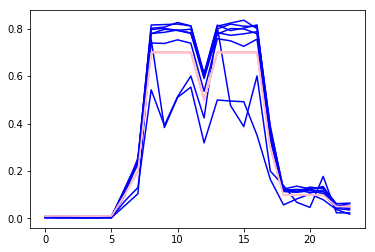

In [51]:
devMax()